K-Nearest-Neighbors with Sklearn and Scipy.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from scipy.spatial.distance import pdist

Part A: 

- Need to generate a 1000 data points from in increasing dimensions from 2 to 10.
- Each dimension should follow a uniform random variable between -1 and 1.
- for each data point in each dimension, calculate the data points euclidean distance from the origin.
count the number of data points less than or equal to 1.
- Divide the count by the total number of data points (1,000) to get the fraction of data points within the unit hypersphere for each dimension.
- plot the fraction vs dimension as dimensions increase 



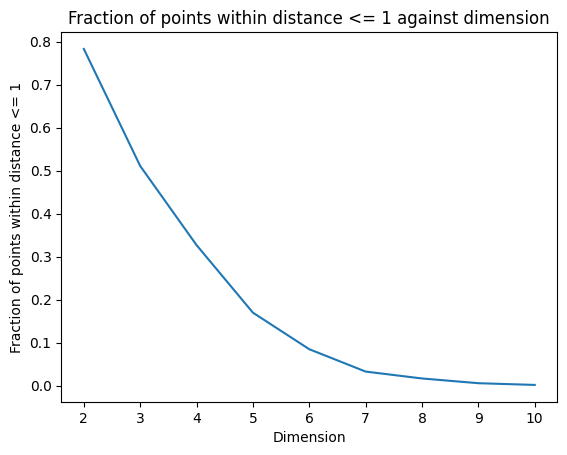

In [9]:
np.random.seed(78)

def generate_points(d: int):
    return np.random.uniform(-1, 1, (1000, d))

x = range(2,11)
fractions = []

# Calculate the fraction of points within distance <= 1 for each dimension
def calculate_fractions():
     
   for dimension in x:
        count = 0    
        points = generate_points(dimension)
        origin_distance = np.linalg.norm(points, axis=1)
         
        for i in range(0, len(origin_distance)):
            if origin_distance[i] <= 1:
                count += 1     
                
        fraction = count/1000
        fractions.append(fraction)

# Plot the fraction of points within distance <= 1 against dimension
def plot_fractions(x: range, fractions: list):
    plt.plot(x, fractions)
    plt.xlabel('Dimension')
    plt.ylabel('Fraction of points within distance <= 1')
    plt.title('Fraction of points within distance <= 1 against dimension')
    plt.show()
    
calculate_fractions()
plot_fractions(x, fractions)



Part B:

- Calculate distance between a data point and it's nearest neighbor (k = 1)
- the mean distances between any pair of data points
- then, divide the mean distance between a data point and it's nearest neighbor by mean distance of any pair of data points.
- do this for each dimension from 2 to 10 and plot the ratios vs the dimensions 
- curse of dimensionality.


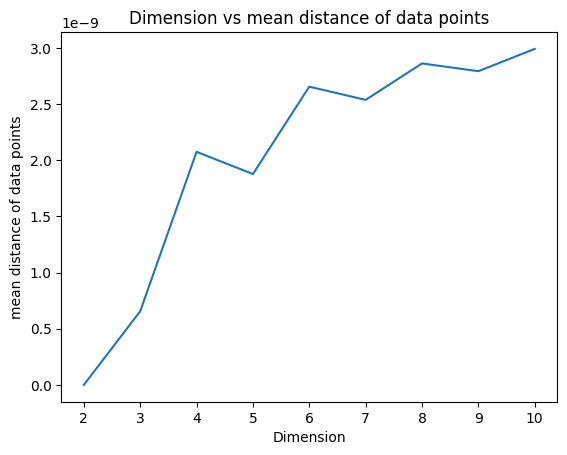

In [32]:
np.random.seed(43)

# Function to calculate mean distance between any pair of data points
def mean_pairs(points: np.ndarray):
    pair_distances = pdist(points)
    return np.mean(pair_distances)

# Function to calculate mean distance between nearest neighbors 
def calculate_mean_nn_dist(points: np.ndarray):   
    nbrs = NearestNeighbors(n_neighbors=1, algorithm='brute', metric='euclidean')
    nbrs.fit(points)
    distances, _ = nbrs.kneighbors(points)
    mean_nn_distance = np.mean(distances) 
    mean_pairwise_dist = mean_pairs(points)
    ratio = mean_nn_distance / mean_pairwise_dist
    return ratio

ratios = []

# Function to calculate mean distance between nearest neighbors for each dimension
def get_ratios():   
    for dimension in x:   
        points = generate_points(dimension)   
        ratio = calculate_mean_nn_dist(points) 
        ratios.append(ratio)

# Function to plot the mean distance between nearest neighbors for each dimension
def plot_ratios(x, ratios):
    plt.plot(x, ratios)
    plt.xlabel('Dimension')
    plt.ylabel('mean distance of data points')
    plt.title('Dimension vs mean distance of data points')
    plt.show()


get_ratios()
plot_ratios(x, ratios)